In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Anomaly+-+DBScan.csv')
df.fillna(df.median(),inplace =True)
df_num=df.select_dtypes(include=["float64","int64"])


<ipython-input-2-9aa8fc0479e3>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace =True)


In [55]:
df_scale=StandardScaler().fit_transform(df_num)


In [59]:
df_num

,Rooms,Price,Postcode,Propertycount,Distance
0,3,1490000.0,3067,4019,3.0
1,3,1220000.0,3067,4019,3.0
2,3,1420000.0,3067,4019,3.0
3,3,1515000.0,3040,1543,7.5
4,2,670000.0,3042,3464,10.4
...,...,...,...,...,...
63018,3,566000.0,3064,5833,20.6
63019,3,500000.0,3064,5833,20.6
63020,3,545000.0,3064,5833,20.6
63021,3,830000.0,3074,7955,15.3


In [62]:
df_scale_data=pd.DataFrame(df_scale)

<Axes: >

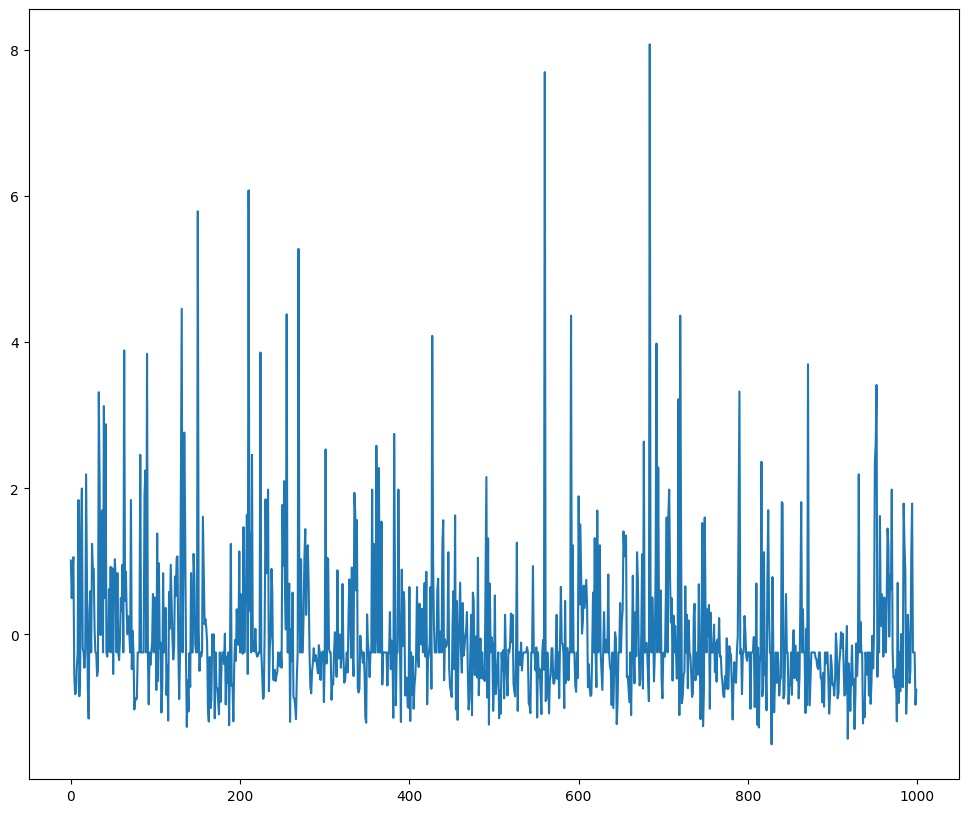

In [65]:
df_scale_data[1][:1000].plot(figsize=(12,10))

In [66]:
dbscan = DBSCAN(eps=2.5, min_samples=100) # 
dbscan.fit(df_scale[:5000])
l=dbscan.labels_

In [67]:
set(l)

{-1, 0, 1}

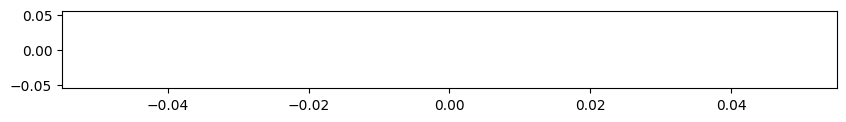

In [68]:

plt.figure(figsize=(10,1))
plt.plot()
unique_labels=set(l)
colors=['blue','red']
plt.show()

In [69]:
n_clusters = len(set(l)) - (1 if -1 in l else 0)
n_noise = list(l).count(-1)
print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 2
Number of noise points: 23


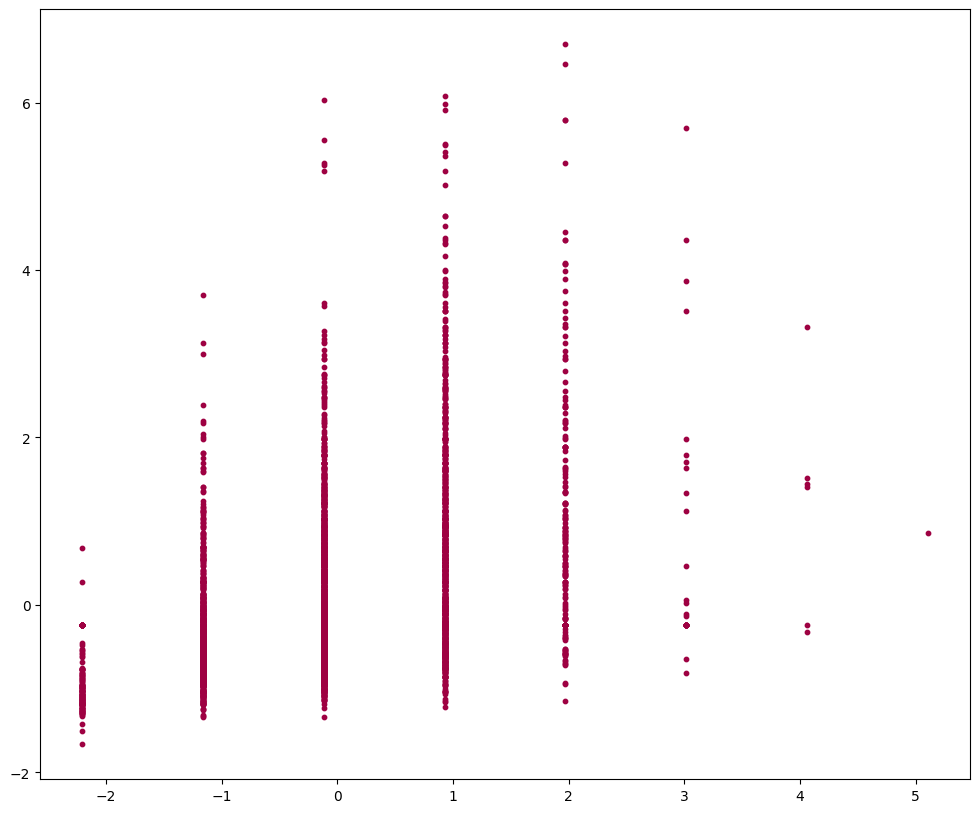

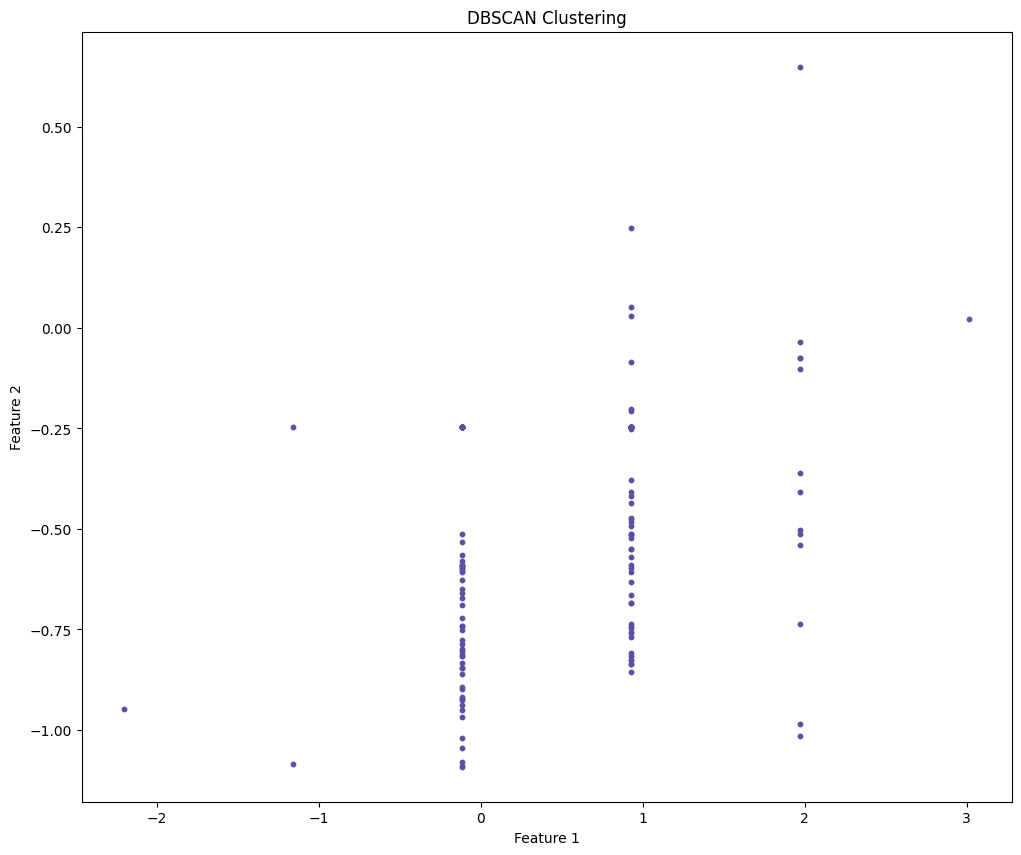

In [72]:
# Create an array of unique labels excluding noise (-1)
unique_labels = set(l) - {-1}

# Assign a color to each cluster label
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot the data points with their assigned cluster labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Plot noise points in black
        col = [0, 0, 0, 1]

    # Create a boolean array to select data points belonging to the current cluster label
    class_member_mask = (l == k)

    # Plot the data points for the current cluster label
    xy = df_scale[:5000][class_member_mask]
    plt.figure(figsize=(12,10))
    plt.scatter(xy[:, 0], xy[:, 1], s=10, c=[col], marker='o')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [73]:
non_anomalous_indices = np.where(l != -1)[0]


In [74]:
non_anomalous_indices

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [75]:
 np.where(l != -1)

(array([   0,    1,    2, ..., 4997, 4998, 4999]),)

In [77]:
filtered_data = df_scale[:5000][non_anomalous_indices]


In [78]:
filtered_data

array([[-0.11549817,  1.01122441, -0.46705262, -0.81338438, -1.27566999],
       [-0.11549817,  0.49701411, -0.46705262, -0.81338438, -1.27566999],
       [-0.11549817,  0.87791063, -0.46705262, -0.81338438, -1.27566999],
       ...,
       [-0.11549817,  1.86633711,  0.13791826, -0.62872607, -0.84099935],
       [-2.20417566, -1.02371527,  0.13791826, -0.62872607, -0.84099935],
       [-1.15983691, -0.71233236,  0.13791826, -0.62872607, -0.84099935]])

### Non Anomaly data

In [79]:
df_num.iloc[list(non_anomalous_indices)]

,Rooms,Price,Postcode,Propertycount,Distance
0,3,1490000.0,3067,4019,3.0
1,3,1220000.0,3067,4019,3.0
2,3,1420000.0,3067,4019,3.0
3,3,1515000.0,3040,1543,7.5
4,2,670000.0,3042,3464,10.4
...,...,...,...,...,...
4995,3,830000.0,3143,4836,6.3
4996,3,2675000.0,3143,4836,6.3
4997,3,1939000.0,3143,4836,6.3
4998,1,421500.0,3143,4836,6.3


In [80]:
anomalous_indices = np.where(l == -1)[0]


### Anomaly data 

In [81]:
df_num.iloc[list(anomalous_indices)]

,Rooms,Price,Postcode,Propertycount,Distance
149,5,830000.0,3756,39,44.2
150,7,4000000.0,3168,5837,16.7
474,3,378000.0,3810,17384,47.3
560,5,5000000.0,3141,14887,2.7
684,5,5200000.0,3143,4836,6.3
1361,6,5000000.0,3122,11308,5.3
1544,8,1456000.0,3141,14887,2.7
1593,5,6700000.0,3142,7217,4.1
1871,4,4855000.0,3146,10412,7.3
2018,4,5440000.0,3206,2019,3.0
